In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 10

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

# because every 68 elements in the dataset is a batch of 32 images
# 68*32 = 2176

68

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    
# image batch - ie a particular batch has 32 image each of size 256x256 having 3 rgb channels each
# label batch - shows each image of a batch indicating the class of each image (0,1,2)

(32, 256, 256, 3)
[1 1 0 1 1 1 0 1 0 1 0 1 1 0 2 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1]


In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])
    
# first image of this batch     

tf.Tensor(
[[[ 93.  91. 104.]
  [ 99.  97. 110.]
  [121. 119. 132.]
  ...
  [123. 124. 142.]
  [117. 118. 136.]
  [113. 114. 132.]]

 [[116. 114. 127.]
  [107. 105. 118.]
  [111. 109. 122.]
  ...
  [133. 134. 152.]
  [135. 136. 154.]
  [137. 138. 156.]]

 [[120. 118. 131.]
  [103. 101. 114.]
  [ 95.  93. 106.]
  ...
  [142. 143. 161.]
  [143. 144. 162.]
  [143. 144. 162.]]

 ...

 [[101.  98. 117.]
  [ 83.  80.  99.]
  [111. 108. 127.]
  ...
  [150. 152. 165.]
  [166. 168. 181.]
  [172. 174. 187.]]

 [[121. 118. 137.]
  [144. 141. 160.]
  [102.  99. 118.]
  ...
  [162. 164. 177.]
  [172. 174. 187.]
  [177. 179. 192.]]

 [[102.  99. 118.]
  [125. 122. 141.]
  [117. 114. 133.]
  ...
  [162. 164. 177.]
  [165. 167. 180.]
  [167. 169. 182.]]], shape=(256, 256, 3), dtype=float32)


In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())
    
# converting tensor to array

[[[195. 197. 209.]
  [197. 199. 211.]
  [196. 198. 210.]
  ...
  [167. 171. 183.]
  [184. 188. 200.]
  [179. 183. 195.]]

 [[182. 184. 196.]
  [186. 188. 200.]
  [188. 190. 202.]
  ...
  [180. 184. 196.]
  [182. 186. 198.]
  [167. 171. 183.]]

 [[191. 193. 205.]
  [196. 198. 210.]
  [196. 198. 210.]
  ...
  [175. 179. 191.]
  [172. 176. 188.]
  [170. 174. 186.]]

 ...

 [[149. 147. 160.]
  [151. 149. 162.]
  [150. 148. 161.]
  ...
  [145. 143. 157.]
  [134. 132. 146.]
  [130. 128. 142.]]

 [[149. 147. 160.]
  [136. 134. 147.]
  [127. 125. 138.]
  ...
  [133. 131. 145.]
  [122. 120. 134.]
  [131. 129. 143.]]

 [[165. 163. 176.]
  [143. 141. 154.]
  [137. 135. 148.]
  ...
  [138. 136. 150.]
  [126. 124. 138.]
  [138. 136. 150.]]]


In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)
    
# shape of 1st image

(256, 256, 3)


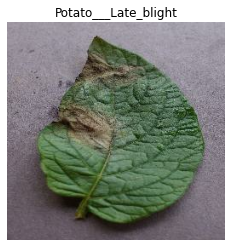

In [10]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0].numpy()])
    plt.axis("off")
    
# previewing the first image

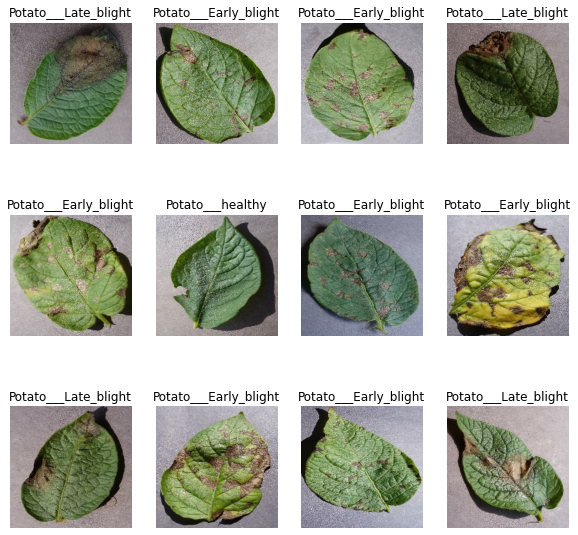

In [11]:
plt.figure(figsize = (10,10))

for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i].numpy()])
        plt.axis("off")
        
# printing 1st 12 images from a batch

In [12]:
# split the data:
#     80% --> training
#     20% --> 10% validation, 10% test

len(dataset)*0.8

54.400000000000006

In [13]:
train_ds = dataset.take(54)

len(train_ds)

54

In [14]:
test_ds = dataset.skip(54)

len(test_ds)

14

In [15]:
len(dataset)*0.1

6.800000000000001

In [16]:
val_ds = test_ds.take(6)

len(val_ds)

6

In [17]:
test_ds = test_ds.skip(6)

len(test_ds)

8

In [18]:
# creating a function to split the dataset

def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    rem_ds = ds.skip(train_size)
    val_ds = rem_ds.take(val_size)
    test_ds = rem_ds.skip(val_size)

    return train_ds, val_ds, test_ds 

In [19]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [20]:
len(train_ds)

54

In [21]:
len(val_ds)

6

In [22]:
len(test_ds)

8

In [23]:
# to enhance the performance while training

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [24]:
# resizing and rescaling the dataset

resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [25]:
# data augmentation (to deal with rotated, mirrored, contrasted, etc transformed images)

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [26]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape = input_shape)

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [28]:
model.compile(
    optimizer = 'adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [29]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/10
54/54 [==============================] - 90s 2s/step - loss: 0.8753 - accuracy: 0.5278 - val_loss: 0.9393 - val_accuracy: 0.5573
Epoch 2/10
54/54 [==============================] - 82s 2s/step - loss: 0.6312 - accuracy: 0.7465 - val_loss: 0.4063 - val_accuracy: 0.8229
Epoch 3/10
54/54 [==============================] - 81s 2s/step - loss: 0.4880 - accuracy: 0.8079 - val_loss: 0.3720 - val_accuracy: 0.8802
Epoch 4/10
54/54 [==============================] - 82s 2s/step - loss: 0.3549 - accuracy: 0.8594 - val_loss: 0.2369 - val_accuracy: 0.8802
Epoch 5/10
54/54 [==============================] - 85s 2s/step - loss: 0.2470 - accuracy: 0.8981 - val_loss: 0.3503 - val_accuracy: 0.8542
Epoch 6/10
54/54 [==============================] - 91s 2s/step - loss: 0.1603 - accuracy: 0.9439 - val_loss: 0.2180 - val_accuracy: 0.9271
Epoch 7/10
54/54 [==============================] - 96s 2s/step - loss: 0.1691 - accuracy: 0.9369 - val_loss: 0.2622 - val_accuracy: 0.8958
Epoch 8/10
54/54 [==

In [30]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 4s 295ms/step - loss: 0.1543 - accuracy: 0.9453


In [31]:
scores

[0.1543285846710205, 0.9453125]

In [32]:
history

In [33]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
history.history['accuracy']

[0.5277777910232544,
 0.7465277910232544,
 0.8078703880310059,
 0.859375,
 0.8981481194496155,
 0.9438657164573669,
 0.9369212985038757,
 0.9565972089767456,
 0.9751157164573669,
 0.9681712985038757]

In [36]:
history.history['loss']

[0.8752564191818237,
 0.6311644911766052,
 0.4880167543888092,
 0.35492396354675293,
 0.24697911739349365,
 0.16034145653247833,
 0.1690792739391327,
 0.12105859071016312,
 0.0842156708240509,
 0.09632345288991928]

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

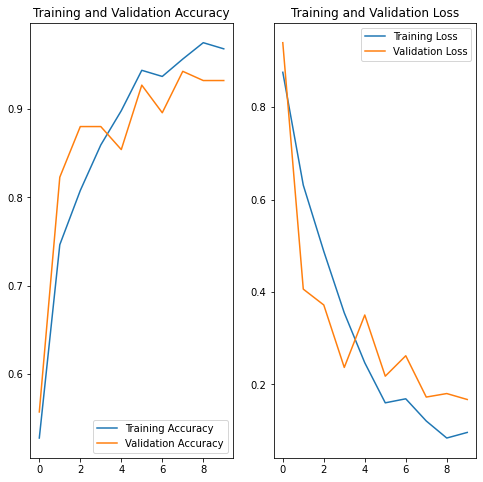

In [44]:
plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

Image to Predict
Actual Label    :  Potato___Early_blight
Predicted Label :  Potato___Early_blight


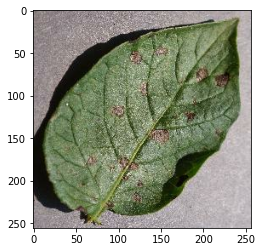

In [134]:
import numpy as np

for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print('Image to Predict')
    plt.imshow(first_image)
    
    print('Actual Label    : ', class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print('Predicted Label : ', class_names[np.argmax(batch_prediction[0])])

In [135]:
def predict(model, img):
    
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)   # create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    
    return predicted_class, confidence 

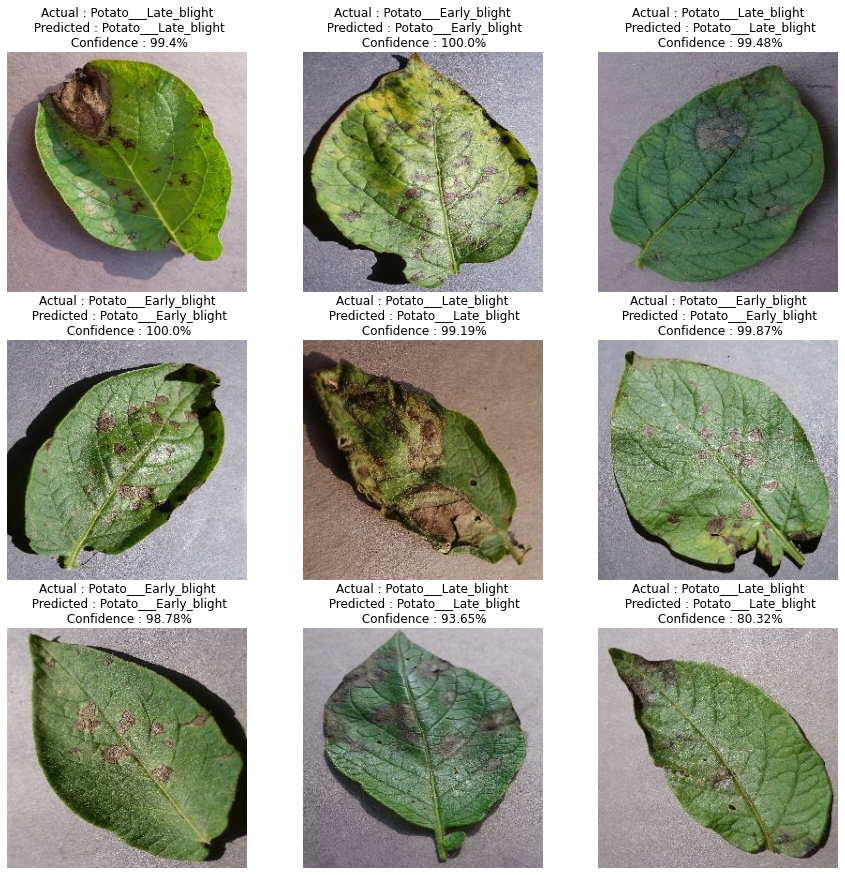

In [145]:
plt.figure(figsize = (15, 15))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f'Actual : {actual_class}\n Predicted : {predicted_class}\n Confidence : {confidence}%')
        
        plt.axis('off')

In [150]:
model.save('./model/1')

# saving the model

INFO:tensorflow:Assets written to: ./model/1\assets


In [152]:
import os

model_version = max([int(i) for i in os.listdir('./model') + [0]]) + 1
model.save(f'./model/{model_version}')

INFO:tensorflow:Assets written to: ./model/2\assets
